### Find imports and exports

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
from constants import NO_NODES

CASE = "Base" #NOgrid
NO_NODES_INCL_ONSHR = NO_NODES + [f"NO{i}" for i in range(1, 6)]

df = pd.read_csv(f"Results/{CASE}/results_output_Operational.csv")
df = df[df["Node"].isin(NO_NODES_INCL_ONSHR)]
df

,Node,Period,Scenario,Season,Hour,AllGen_MW,Load_MW,Net_load_MW,Liginiteexisting_MW,Lignite_MW,...,storCharge_MW,storDischarge_MW,storEnergyLevel_MWh,LossesChargeDischargeBleed_MW,FlowOut_MW,FlowIn_MW,LossesFlowIn_MW,LoadShed_MW,Price_EURperMWh,AvgCO2_kgCO2perMWh
397440,NO1,2020-2025,scenario1,winter,1,2608.850332,-4208.730947,-2608.850332,0.0,0.0,...,-0.000430,0.000364,708.704603,-0.000066,-0.002162,1649.363756,-49.480913,3.389903e-08,24.260412,8.964869e-09
397441,NO1,2020-2025,scenario1,winter,2,2587.116676,-4179.261068,-2587.116676,0.0,0.0,...,-0.000435,0.000362,708.704608,-0.000067,-0.002174,1641.388287,-49.241649,3.389787e-08,24.260412,8.715905e-09
397442,NO1,2020-2025,scenario1,winter,3,2585.272191,-4257.384049,-2585.272191,0.0,0.0,...,-0.000436,0.000362,708.704616,-0.000066,-0.002185,1723.828987,-51.714870,3.389619e-08,24.260412,8.717798e-09
397443,NO1,2020-2025,scenario1,winter,4,2607.395276,-4377.326275,-2607.395275,0.0,0.0,...,-0.000394,0.000344,708.704608,-0.000058,-0.002018,1824.673266,-54.740198,3.387154e-08,24.260412,8.642316e-09
397444,NO1,2020-2025,scenario1,winter,5,2583.892150,-4520.550244,-2583.892150,0.0,0.0,...,-0.000437,0.000361,708.704618,-0.000066,-0.002209,1996.557092,-59.896713,3.389403e-08,24.260412,8.715107e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157755,SørvestD,2055-2060,scenario3,peak2,716,2340.492192,-0.000000,-2340.492192,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-2861.901864,537.535742,-16.126072,2.433238e-06,31.477246,0.000000e+00
1157756,SørvestD,2055-2060,scenario3,peak2,717,1953.843867,-0.000000,-1953.843866,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-2446.695416,508.094378,-15.242831,2.430665e-06,31.477250,0.000000e+00
1157757,SørvestD,2055-2060,scenario3,peak2,718,2022.524232,-0.000000,-2022.524232,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-2501.695769,493.991273,-14.819738,2.430631e-06,31.477248,0.000000e+00
1157758,SørvestD,2055-2060,scenario3,peak2,719,2010.478265,-0.000000,-2010.478265,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-2482.647448,486.772351,-14.603171,2.430598e-06,31.477251,0.000000e+00


In [63]:
winter_hours = [1, 168] # 168
spring_hours = [169, 336] # 168
summer_hours = [337, 504] # 168
fall_hours = [505, 672] # 168
peak1_hours = [673, 696] # 24
peak2_hours = [697, 720] # 24

Calculate mean values of scenarios 

In [64]:
df = df.groupby(["Node", "Period", "Hour"]).mean(numeric_only=True).reset_index()
df

,Node,Period,Hour,AllGen_MW,Load_MW,Net_load_MW,Liginiteexisting_MW,Lignite_MW,LigniteCCSadv_MW,Coalexisting_MW,...,storCharge_MW,storDischarge_MW,storEnergyLevel_MWh,LossesChargeDischargeBleed_MW,FlowOut_MW,FlowIn_MW,LossesFlowIn_MW,LoadShed_MW,Price_EURperMWh,AvgCO2_kgCO2perMWh
0,NO1,2020-2025,1,2339.708821,-5054.756816,-2339.708821,0.0,0.0,0.0,0.0,...,-0.000862,0.000282,708.705027,-0.000155,-0.001583,2799.020781,-83.970623,3.391166e-08,37.305163,0.002047
1,NO1,2020-2025,2,2337.379407,-5060.382938,-2337.379407,0.0,0.0,0.0,0.0,...,-0.000867,0.000282,708.705458,-0.000155,-0.001613,2807.222401,-84.216672,3.391847e-08,37.305163,0.002076
2,NO1,2020-2025,3,2332.778339,-5064.894000,-2332.778339,0.0,0.0,0.0,0.0,...,-0.000862,0.000281,708.705886,-0.000154,-0.001618,2816.616351,-84.498491,3.391673e-08,37.305165,0.002282
3,NO1,2020-2025,4,2332.436226,-4989.972707,-2332.436226,0.0,0.0,0.0,0.0,...,-0.000843,0.000274,708.706305,-0.000150,-0.001560,2739.730526,-82.191916,3.390759e-08,37.305163,0.002076
4,NO1,2020-2025,5,2318.032831,-4927.771473,-2318.032831,0.0,0.0,0.0,0.0,...,-0.000855,0.000280,708.706728,-0.000152,-0.001620,2690.454471,-80.713634,3.391449e-08,37.305163,0.002025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143995,VestavindF,2055-2060,716,0.006133,0.000000,-0.006133,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-0.092057,0.088579,-0.002657,2.726754e-06,382.515770,0.000000
143996,VestavindF,2055-2060,717,0.006547,0.000000,-0.006547,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-0.093749,0.089896,-0.002697,2.726675e-06,382.527242,0.000000
143997,VestavindF,2055-2060,718,0.006799,0.000000,-0.006799,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-0.092656,0.088509,-0.002655,2.727826e-06,383.358011,0.000000
143998,VestavindF,2055-2060,719,0.007200,0.000000,-0.007200,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-0.089201,0.084535,-0.002536,2.726224e-06,383.327386,0.000000


In [65]:
# Assume 91% share of exports kept by Norway
avg_price_UK_and_GER_2050 = (37.8 + 32.5)/2
revenue_share_from_exports = (30 - (avg_price_UK_and_GER_2050-30)/2)/30
print(revenue_share_from_exports)

def calc_net_exports(df_row):
    return (-df_row["FlowOut_MW"]) - (df_row["FlowIn_MW"] + df_row["LossesFlowIn_MW"]) # Note signs from data set

def calc_revenue_net_exports(df_row):
    # If positive: Received from exports; If negative: Paid for imports
    return df_row["Net exports (MWh)"] * df_row["Price_EURperMWh"] * revenue_share_from_exports

df["Net exports (MWh)"] = df.apply(lambda row: calc_net_exports(row), axis=1)
df["Price of net exports (EUR)"] = df.apply(lambda row: calc_revenue_net_exports(row), axis=1)

net_exports_by_hour_MWh = list(df.groupby(by=["Period", "Hour"])["Net exports (MWh)"].sum())
revenue_net_exports_by_hour_EUR = list(df.groupby(by=["Period", "Hour"])["Price of net exports (EUR)"].sum())
hours = [i+1 for i in range(len(net_exports_by_hour_MWh))]

0.9141666666666667


Net exports Norway incl. OWPs (TWh)


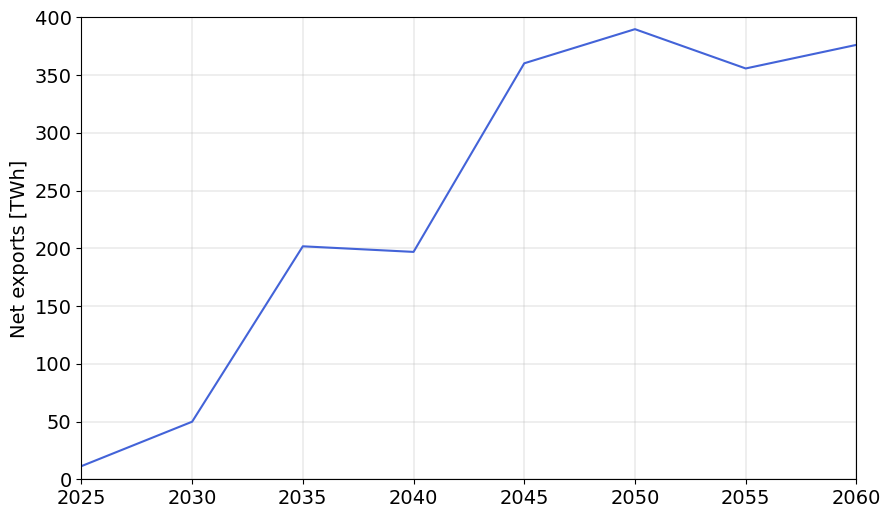

Average net export per year: 242.7 TWh


In [66]:
# Scale hours to obtain true number of hours in a year
SCALING_FACTOR = (365*24) * 5 / 720

print("Net exports Norway incl. OWPs (TWh)")

net_exports_by_hour_TWh = [x/10**6 * SCALING_FACTOR for x in net_exports_by_hour_MWh]
net_exports_by_period_TWh = [sum(net_exports_by_hour_TWh[(720*i-720):(720*i)]) for i in range(1, 9)]
net_exports_per_year_by_period_TWh = [x/5 for x in net_exports_by_period_TWh]

years = [i for i in range(len(net_exports_per_year_by_period_TWh))]

plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(10,6))
plt.rc('axes', axisbelow=True)
plt.grid(lw=0.3)

plt.plot(years, net_exports_per_year_by_period_TWh, color="#4363d8")
plt.ylabel("Net exports [TWh]")
plt.margins(x=0)
plt.ylim(0, 400)

# Change ticks
plt.xticks(ticks=[i for i in range(8)], labels=[2025+5*i for i in range(8)])
plt.savefig(f"SavedFigs/NetExports/Volume-Norway-{CASE}", bbox_inches='tight')
plt.show()

print(f"Average net export per year: {round(sum(net_exports_by_hour_TWh)/40, 1)} TWh")

Revenue from net exports (BEUR)


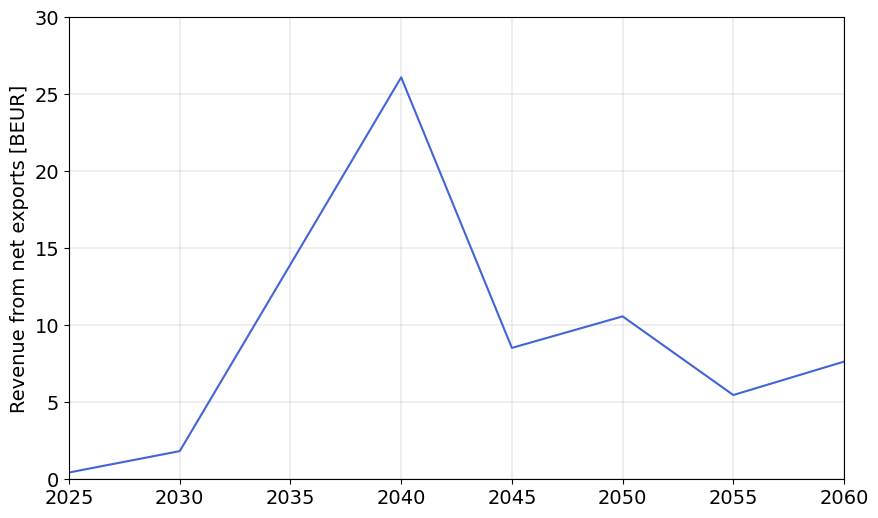

Revenue of net exports per year: 9.3 BEUR


In [67]:
print("Revenue from net exports (BEUR)")

revenue_net_exports_by_hour_BEUR = [x/10**9 * SCALING_FACTOR for x in revenue_net_exports_by_hour_EUR]
revenue_net_exports_by_period_BEUR = [sum(revenue_net_exports_by_hour_BEUR[(720*i-720):(720*i)]) for i in range(1, 9)]
revenue_net_exports_per_year_by_period_BEUR = [x/5 for x in revenue_net_exports_by_period_BEUR]

years = [i for i in range(len(revenue_net_exports_per_year_by_period_BEUR))]

plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(10,6))
plt.rc('axes', axisbelow=True)
plt.grid(lw=0.3)

plt.plot(years, revenue_net_exports_per_year_by_period_BEUR, color="#4363d8")
plt.ylabel("Revenue from net exports [BEUR]")
plt.margins(x=0)
plt.ylim(0, 30)

# Change ticks
plt.xticks(ticks=[i for i in range(8)], labels=[2025+5*i for i in range(8)])
plt.savefig(f"SavedFigs/NetExports/Revenue-Norway-{CASE}", bbox_inches='tight')
plt.show()

print(f"Revenue of net exports per year: {round(sum(revenue_net_exports_by_hour_BEUR)/40, 1)} BEUR")

In [68]:
average_consumption_NO_in_period_TWh = (145+373) / 2 # TWh, simplified https://www.norskindustri.no/siteassets/dokumenter/rapporter-og-brosjyrer/energy-transition-norway/2023/energy-transition-norway-2023.pdf (p. 29)
print(average_consumption_NO_in_period_TWh)

# From base case to NOgrid (NO2) in 2050
additional_cost_EUR_per_MWh = 6.1

additional_cost_for_consumers_BEUR = round((average_consumption_NO_in_period_TWh * 10**6 * additional_cost_EUR_per_MWh) / 10**9, 1)
print(f"Additional cost for Norwegian consumers (annually): {additional_cost_for_consumers_BEUR} BEUR")

base_case_avg_export_revenues_BEUR = 9.3
NOgrid_avg_export_revenues_BEUR = 2.5
print(f"Foregone export revenues: {round(base_case_avg_export_revenues_BEUR-NOgrid_avg_export_revenues_BEUR, 1)} BEUR")

259.0
Additional cost for Norwegian consumers (annually): 1.6 BEUR
Foregone export revenues: 6.8 BEUR
